# Prédire le salaire d'un adulte avec le Machine Learning 

Problème  :
* Tache de prédiction pour déterminer si un salarié gagne plus de 50 k par an
* Source : https://archive.ics.uci.edu/dataset/2/adult

1. Définir un objectif générale mesurable :
    * Objectif :

       - Prédire les salaires d'un adulte employé 
       - Source des données disponibles sur https://archive.ics.uci.edu/dataset/2/adult
  
    * Metrique : F1 = 60% et Recall = 75%

         - Rappel : F1 est le rapport entre la précision et le recall .

         - le recall permet de réduire au maximum les faux négatifs .

         - la précision permet de réduire au maximum les faux positifs .

EXPLORATORY DATA ANALYSIS

 * Objectif:

   - Mieux comprendre nos données
   - pour etablir une stratégie de modélisation


 * Analyse de la forme :
   - Identification de la target : class
   - Classes légèrement équilibrés (1 un peu plus de 63 % , 0 un peu plus de 36 %)
   - Nombre de lignes et de colonnes : 32561, 16
   - Types de variables : qualitatives : 7 , quantitatives : 13

 * Analyse des valeurs manquantes :
    - Des NaN (Deux variables hover_duration et page > 90% de NaN)
    - Deux grands groupes de données (0% de Nans et un groupe 0.09447)
    - Un groupe de ( deux variables text et text_fqid avec 0.65262 de Nans)
    - Une variable fqid avec 0.31617
 * Analyse du fond :
    - Visualisation de la target (Histogramme / Boxplot)
    - Comprehension des différentes variables (Internet -- Kaggle discusion )
    - quelques variables continues standardisées , skewed (asymétriques) suivant une loi normale
    - Variable qualitative :elles ne sont pas binaire , ce sont des variables qui possèdent plusieurs categories et la variable texte en possède le plus (énorme) ** Relation Variables / Target **
    - target/Medium_na : les variables text et text_fqid semblent liés a la performance des élèves
    - target/Little_na : Les room_coordonnées et les screens_coordonnées x , y semblent etres liés a la   performance des élèves
    - target/zero_na : les variables music , hq , level_group semblent avoir un lien avec la performance des élèves (Hypothèse à tester)
    - Visualisation des relations variables -target(Histogramme/Boxplot)
    - Identification des outliers
  * Conclusion :
     - Une feature engineering avec les variables
  
          -- room_coord , screen_coord peuvent  apporter des informations supplémentaires pour nous permettre de répondre à la question

          -- Les variables text  et  text_fqid peuvent  également  nous apporter beaucoup d'informations puisqu'ils ont  plusieurs categories à étudier 
          
          -- Enfin les variables music , hq , level_group sont très liés à la performance 

In [1]:
## Load EDA
import polars as pl 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns   
import pyarrow
from pathlib import Path
%matplotlib inline  

In [2]:
import polars as pl 

print(pl.__version__)

0.20.7


In [3]:
ADULT_DATA_SALARY_CSV_PATH : str = './data' + '/adult_data_salary.csv'

In [4]:
reader_features = pl.read_csv_batched(
    ADULT_DATA_SALARY_CSV_PATH
)  
features_data = reader_features.next_batches(100)  


features_data = pl.concat(features_data)


In [5]:
data  = pd.read_csv(ADULT_DATA_SALARY_CSV_PATH)
data.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:

df = data.copy()

In [7]:
df.columns


Index(['Unnamed: 0', 'age', 'workclass', 'fnlwgt', 'education',
       'education-num', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native-country', 'class'],
      dtype='object')

In [8]:
df.shape # Nombre de lignes , Nombre de colonnes : dimensionalite du dataset

(32561, 16)

In [9]:

df.dtypes.value_counts()

object    9
int64     7
Name: count, dtype: int64

<Axes: ylabel='count'>

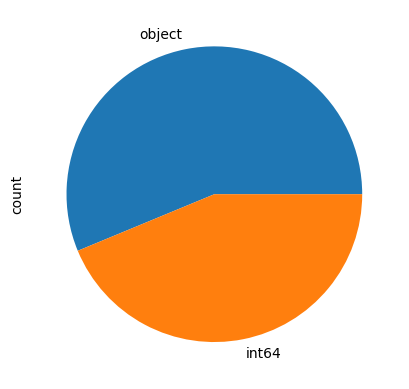

In [10]:
df.dtypes.value_counts().plot.pie()

<Axes: >

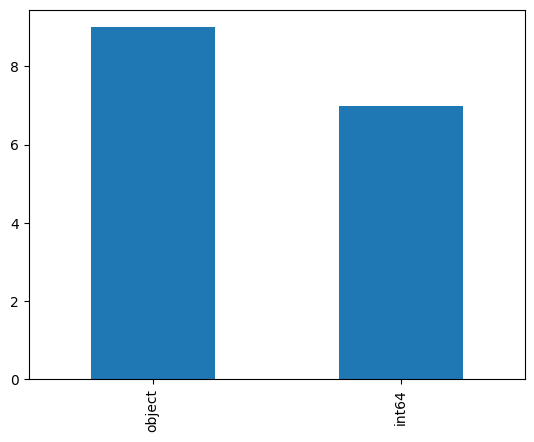

In [11]:
df.dtypes.value_counts().plot(kind = 'bar')

### Analyse des NaN

<Axes: >

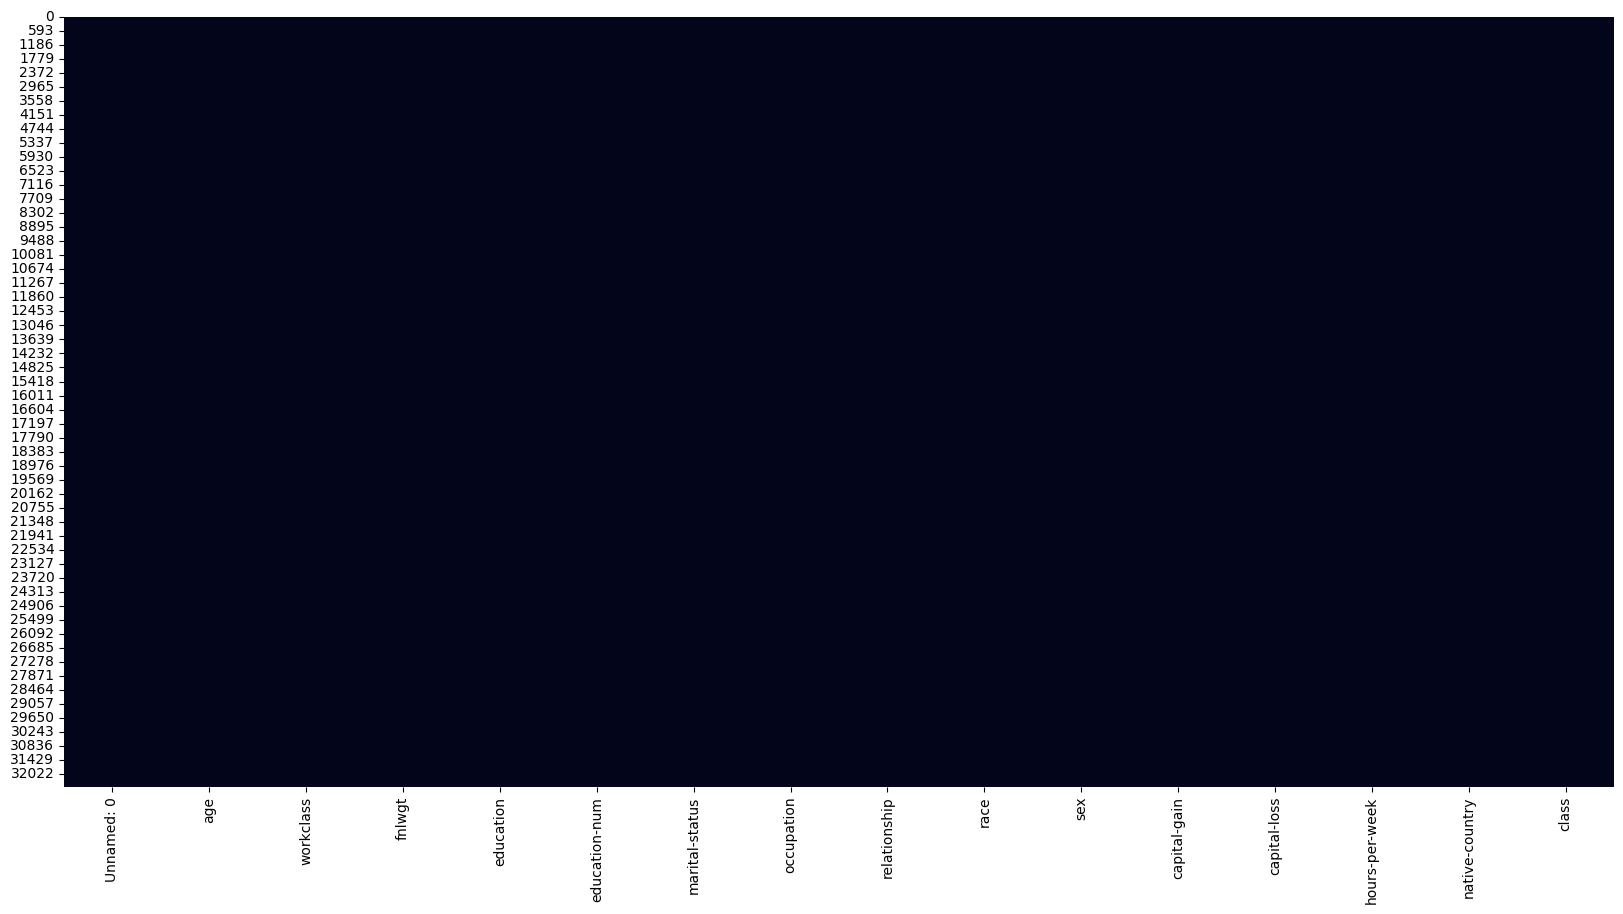

In [12]:
plt.figure(figsize = (20,10))
sns.heatmap(df.isna() , cbar=False)

### Mesurer le pourcentage de valeurs manquantes dans notre dataframe

In [13]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=False)


Unnamed: 0        0.0
age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    0.0
class             0.0
dtype: float64

In [14]:
df = df.drop('Unnamed: 0' , axis=1)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Analyse du fond

Examen de la colonne target

In [15]:
df['class'].value_counts(normalize =True)



class
<=50K    0.75919
>50K     0.24081
Name: proportion, dtype: float64

<Axes: xlabel='class'>

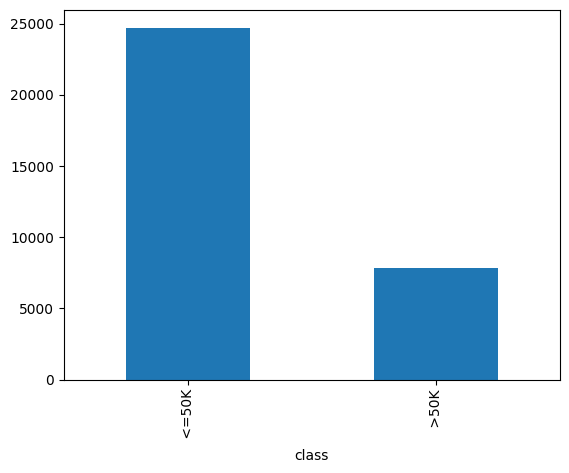

In [16]:
df['class'].value_counts().plot(kind="bar")

Histogrammes des variables continues 

age
fnlwgt
education-num
capital-gain
capital-loss
hours-per-week


<Figure size 640x480 with 0 Axes>

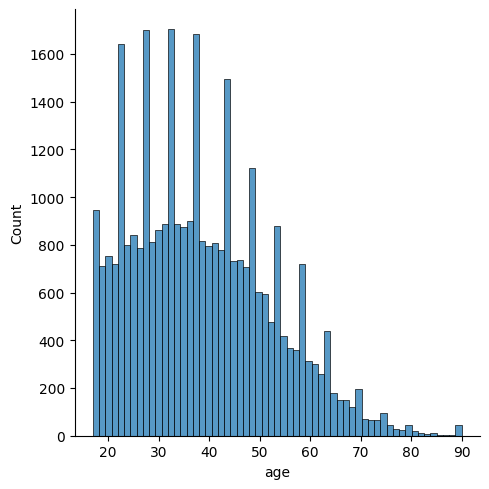

<Figure size 640x480 with 0 Axes>

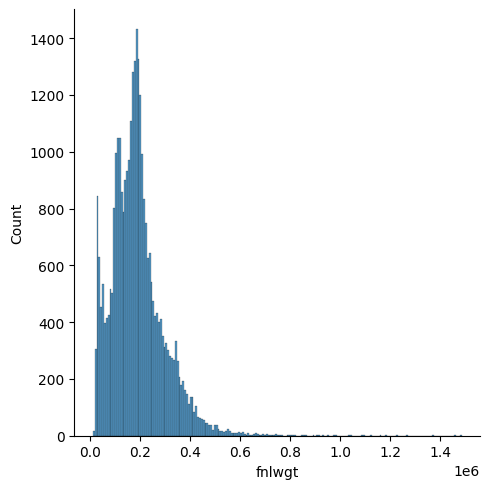

<Figure size 640x480 with 0 Axes>

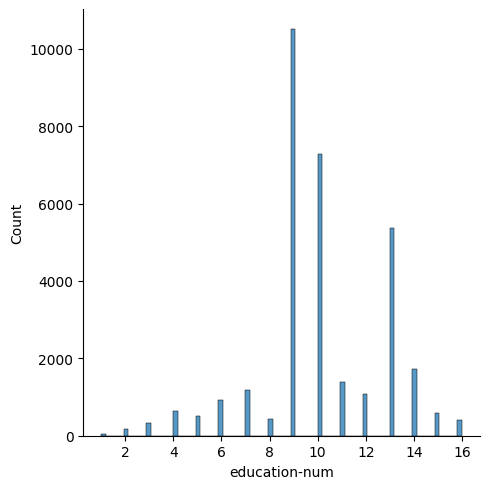

<Figure size 640x480 with 0 Axes>

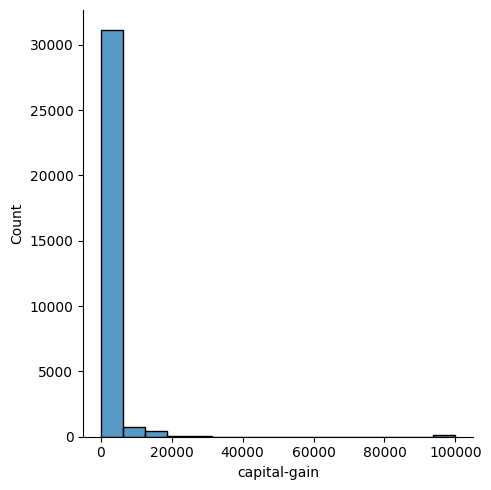

<Figure size 640x480 with 0 Axes>

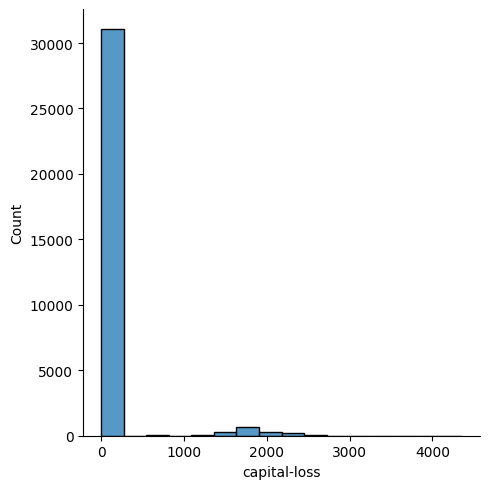

<Figure size 640x480 with 0 Axes>

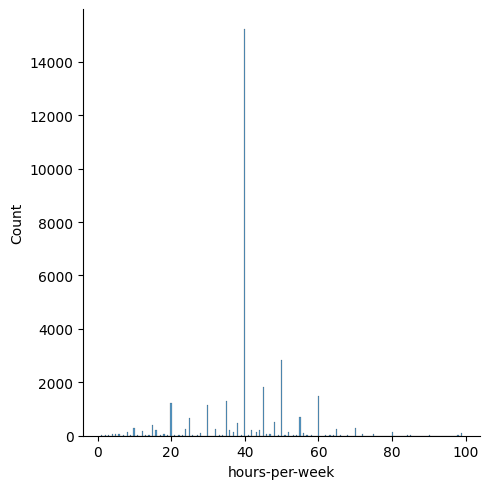

In [17]:
for col in df.select_dtypes('int'):
    plt.figure()
    sns.displot(df[col])
    print(col)

 Variables qualitatives

1. Différentes categories qu'il y'a dans chaque variable

In [18]:
for col in df.select_dtypes('object'):

  print(f'{col :-<30} {df[col].unique()}')
# 1. Différentes categories qu'il y'a dans chaque variable 

workclass--------------------- [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
education--------------------- [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
marital-status---------------- [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation-------------------- [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
relationship------------------ [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race-------------------------- [' White' ' Black' ' Asian-Pac-Island

2. Counter le nombre de valeurs qu'il y'a dans chaque categorie

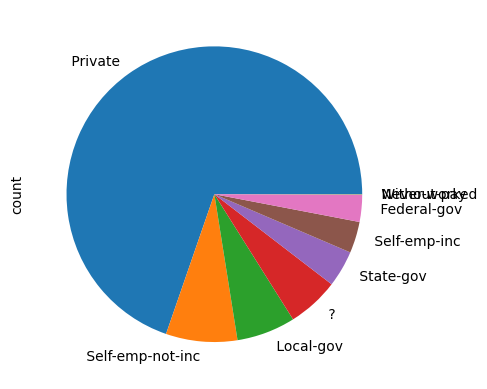

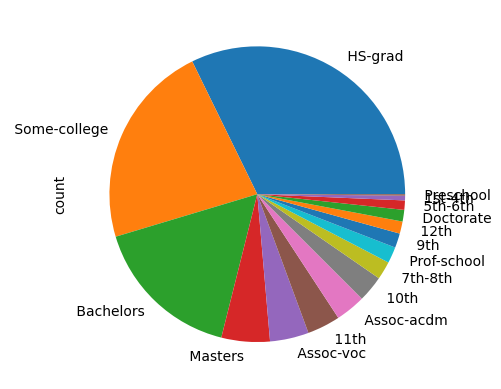

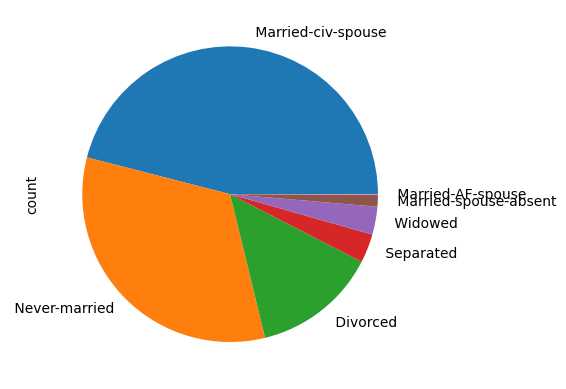

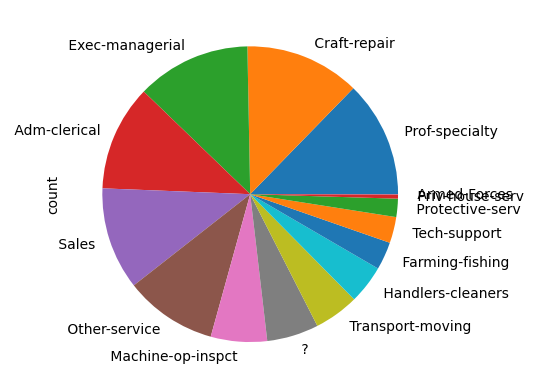

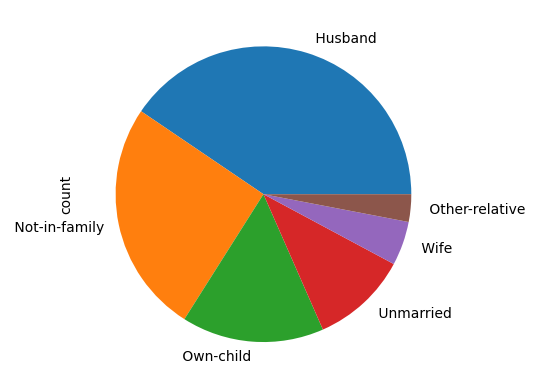

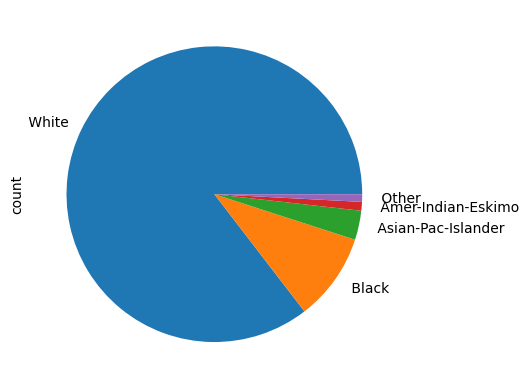

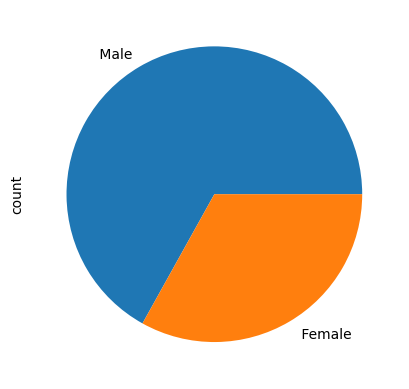

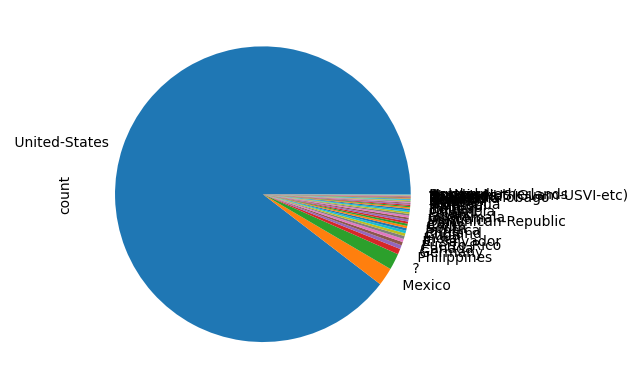

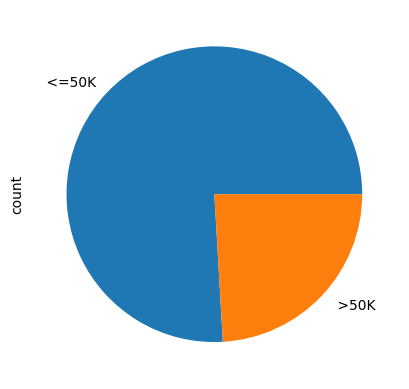

In [19]:
for col in df.select_dtypes('object'):
  plt.figure()
  df[col].value_counts().plot.pie()



  # 2. Counter le nombre de valeurs qu'il y'a dans chaque categorie


Relation Target / Variables
Création des sous-ensembles salaires > 50k  et salaires < 50k 

In [20]:
df['class'].values

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [21]:
np.where(df[df['class'] == ' <=50K'], 0 , 1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [22]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [23]:
df.where(df["class"] == ">50K")

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df[df['class'] == "<=50K"]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class


In [25]:
salary_sup_50k_df = df[df['class'] == ' >50K']


# Créer un dictionnaire de correspondance
mapping = {' >50K': 1, ' <=50K': 0}

# Utiliser la méthode map() pour convertir les valeurs
salary_sup_50k_df['salarysup50k'] = salary_sup_50k_df['class'].astype('object').map(mapping)


salary_sup_50k_df.head()

/tmp/ipykernel_304/469788457.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_sup_50k_df['salarysup50k'] = salary_sup_50k_df['class'].astype('object').map(mapping)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,salarysup50k
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,1
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K,1
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K,1


In [26]:
salary_inforequal_50k_df = df[df['class'] == ' <=50K']

# Créer un dictionnaire de correspondance
mapping = {' >50K': 1, ' <=50K': 0}

# Utiliser la méthode map() pour convertir les valeurs
salary_inforequal_50k_df['salaryinfequal50k'] = salary_inforequal_50k_df['class'].astype('object').map(mapping)


salary_inforequal_50k_df.head()

/tmp/ipykernel_304/4181297291.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_inforequal_50k_df['salaryinfequal50k'] = salary_inforequal_50k_df['class'].astype('object').map(mapping)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,salaryinfequal50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


/home/obs/repository/practicalmlopscourse/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


<Figure size 640x480 with 0 Axes>

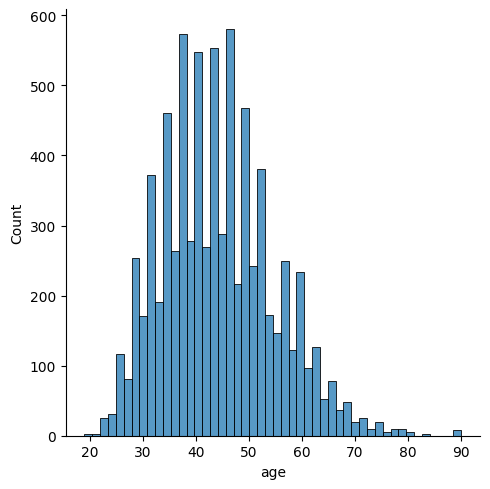

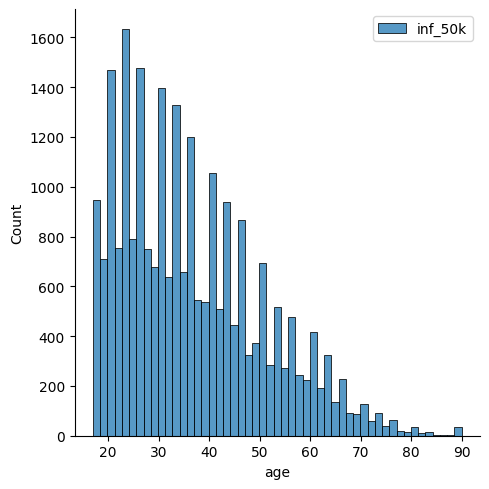

<Figure size 640x480 with 0 Axes>

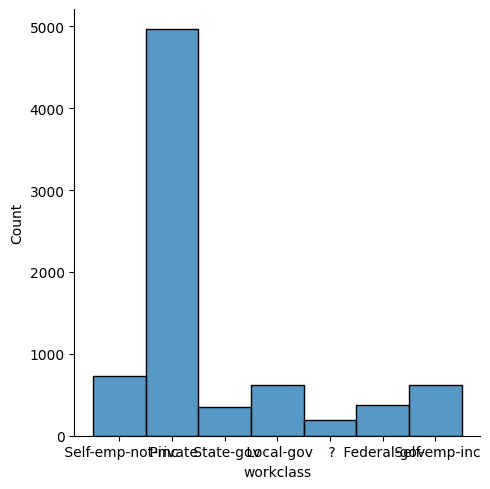

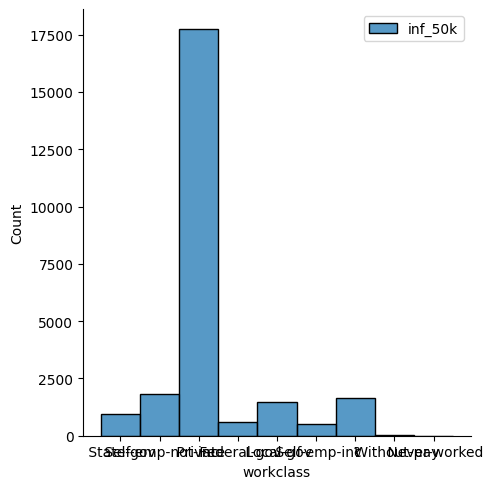

<Figure size 640x480 with 0 Axes>

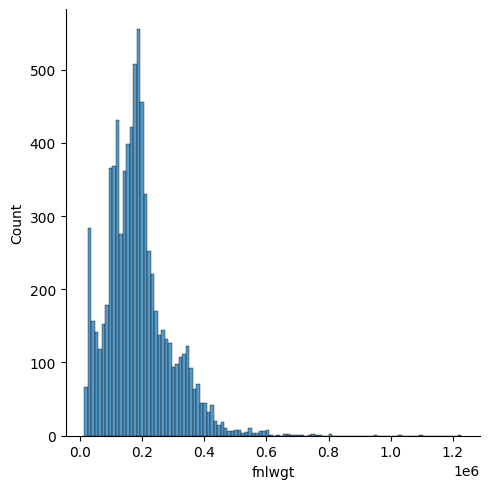

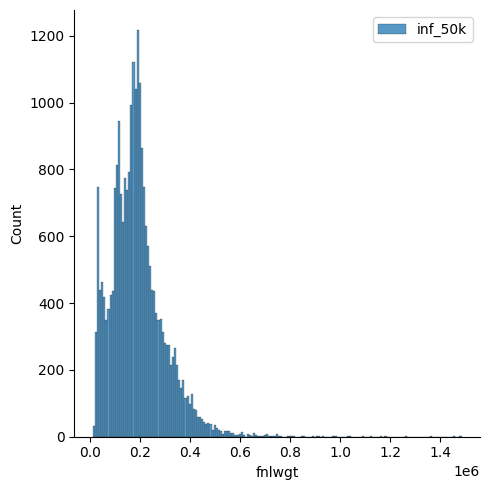

<Figure size 640x480 with 0 Axes>

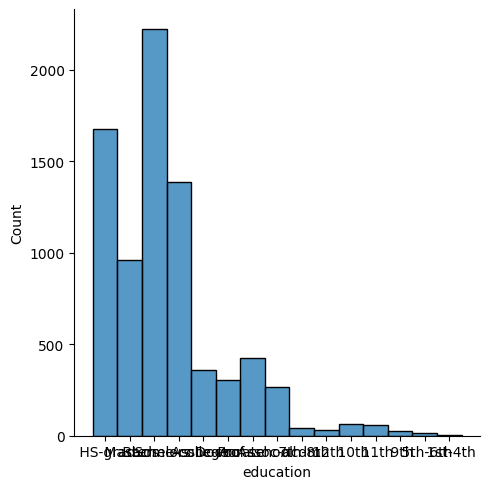

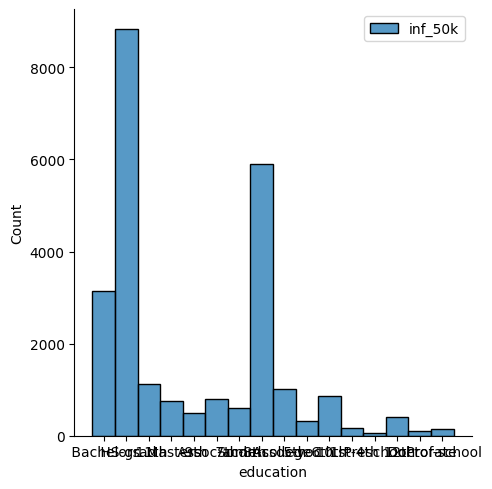

<Figure size 640x480 with 0 Axes>

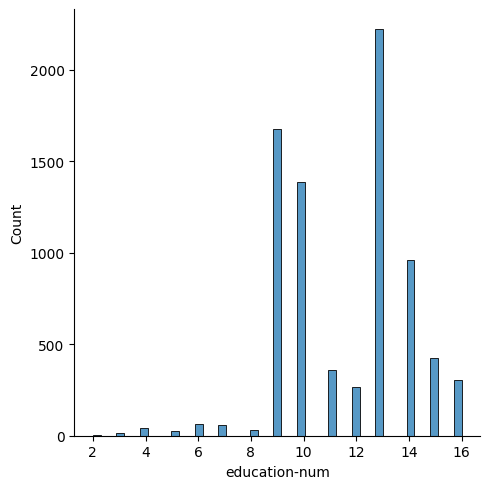

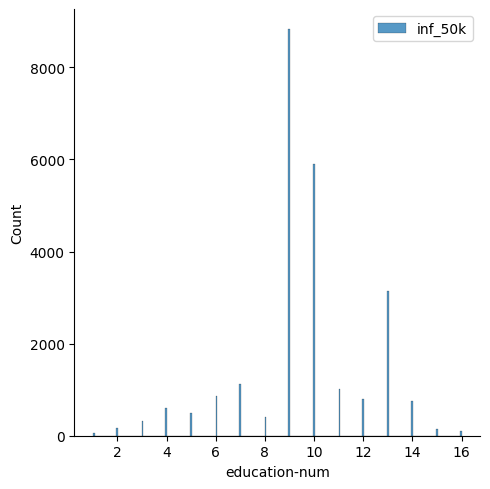

<Figure size 640x480 with 0 Axes>

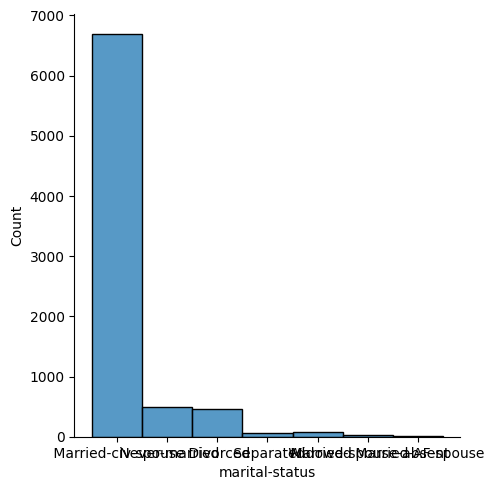

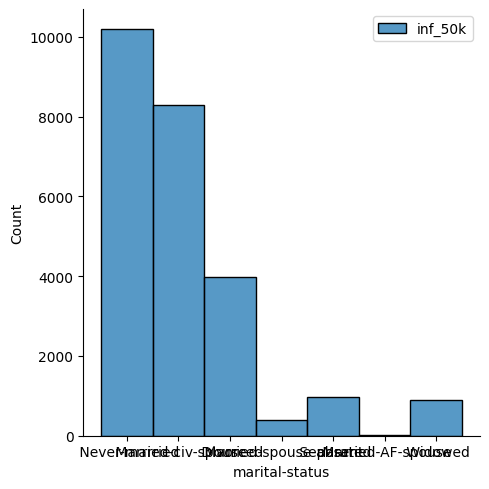

<Figure size 640x480 with 0 Axes>

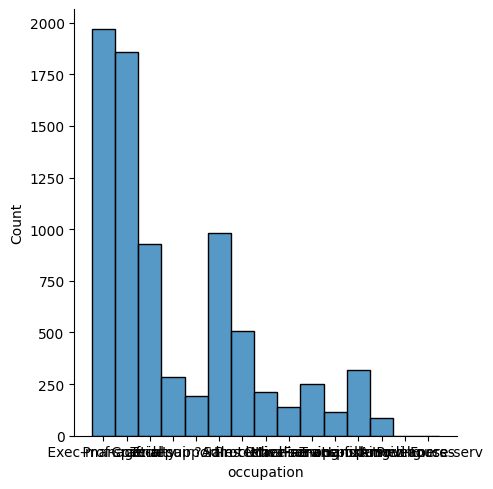

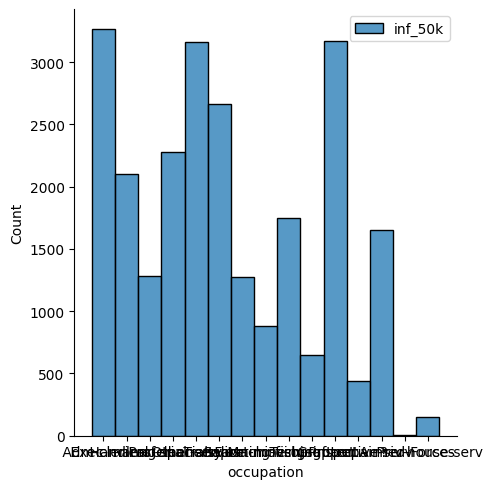

<Figure size 640x480 with 0 Axes>

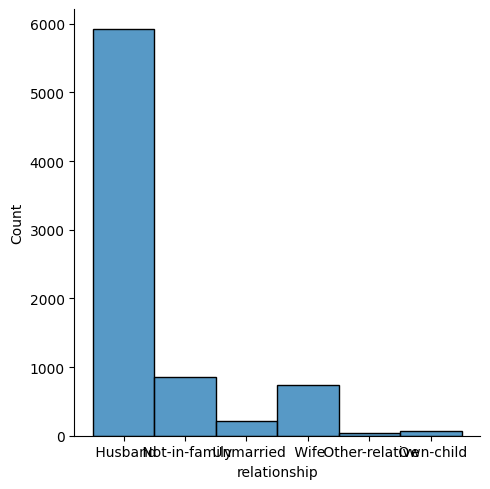

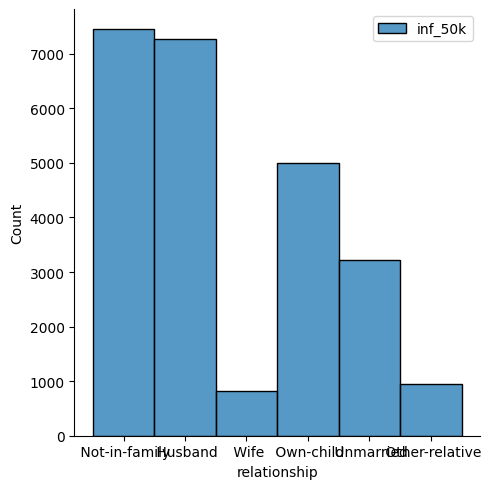

<Figure size 640x480 with 0 Axes>

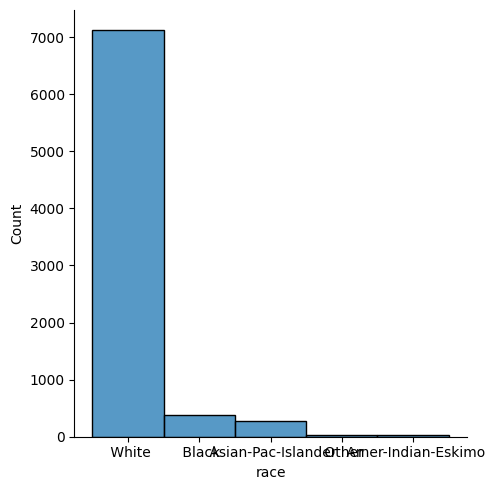

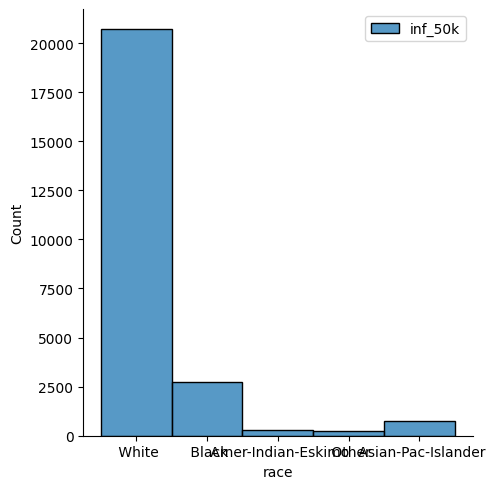

<Figure size 640x480 with 0 Axes>

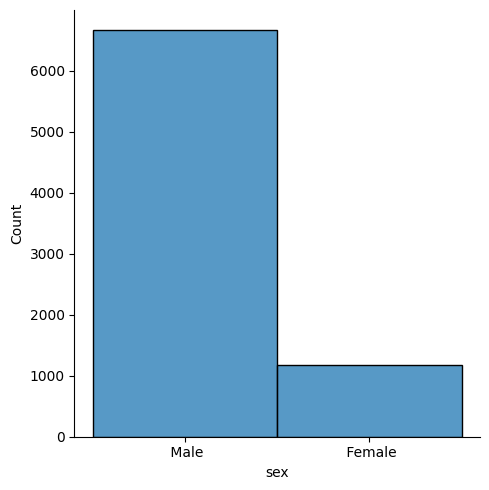

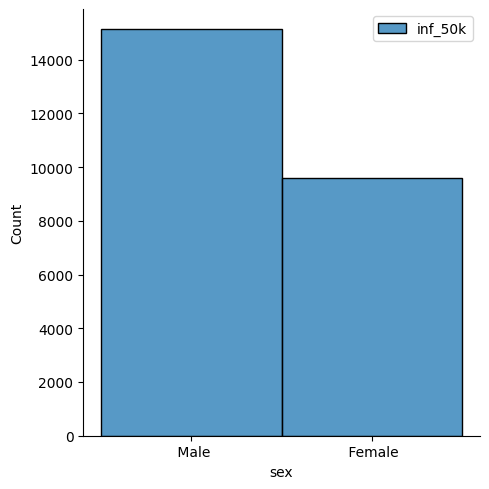

<Figure size 640x480 with 0 Axes>

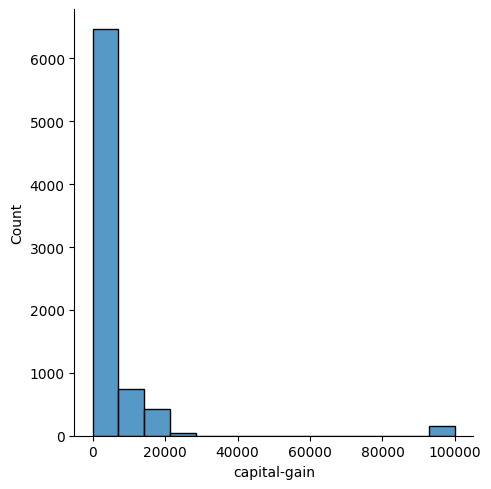

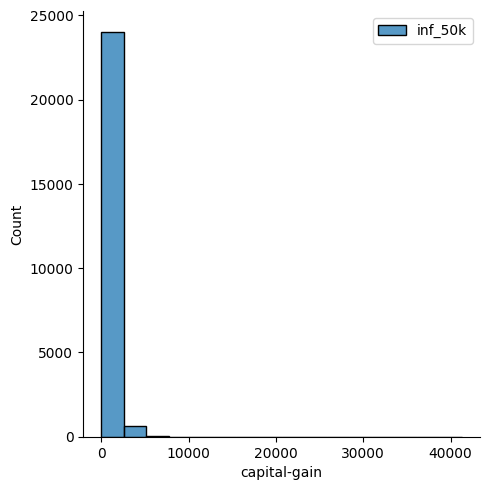

<Figure size 640x480 with 0 Axes>

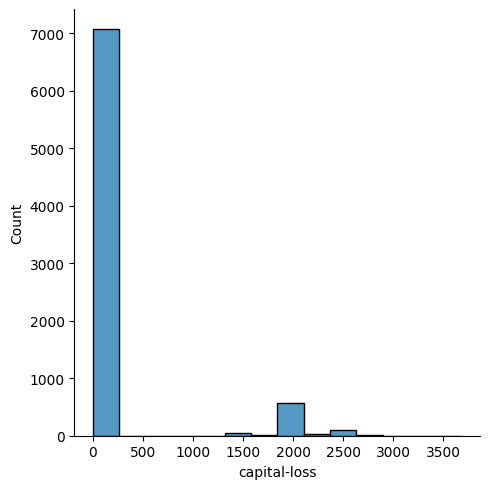

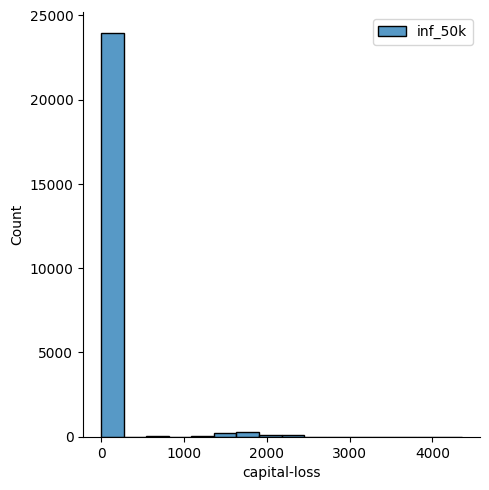

<Figure size 640x480 with 0 Axes>

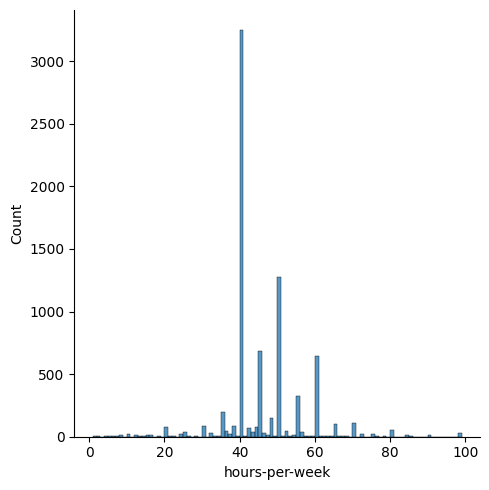

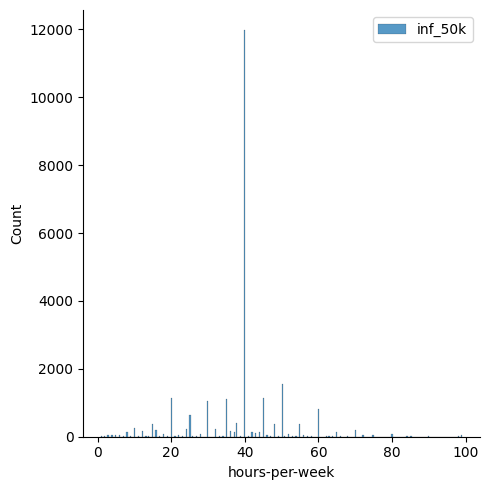

<Figure size 640x480 with 0 Axes>

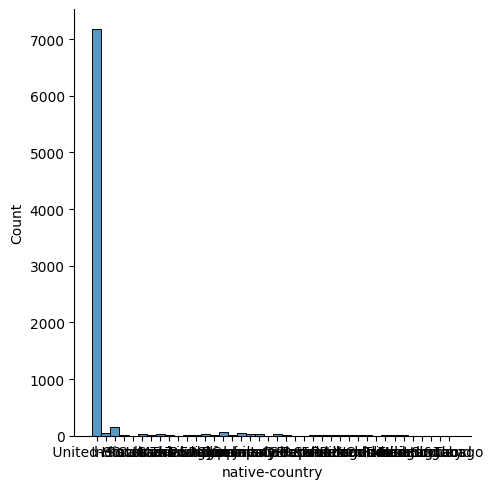

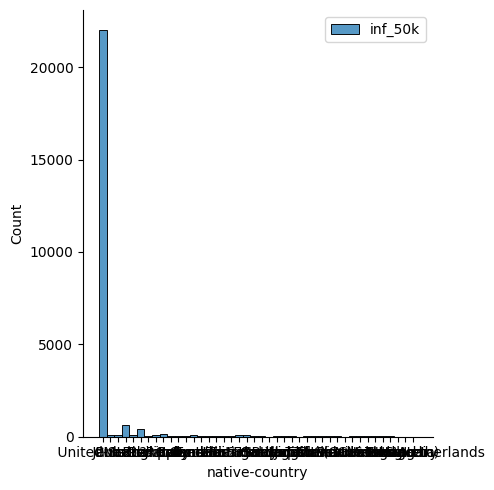

<Figure size 640x480 with 0 Axes>

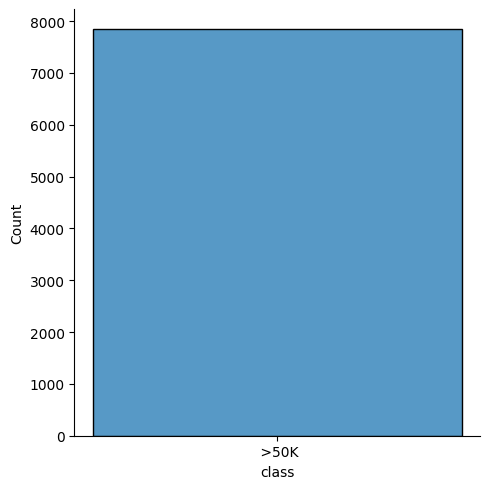

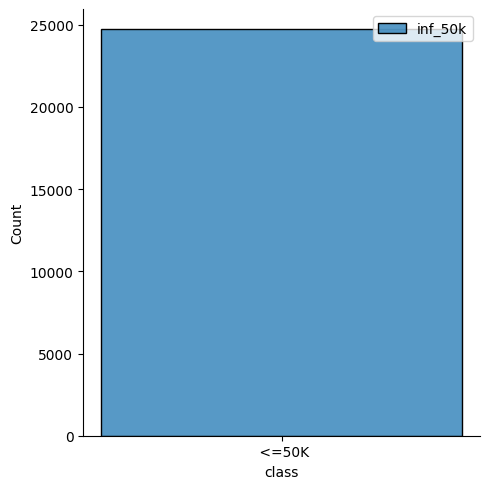

In [27]:
for col in df.columns :
    plt.figure()
    sns.displot(salary_sup_50k_df[col] , label = 'sup_50k')
    sns.displot(salary_inforequal_50k_df[col] , label = 'inf_50k')
    plt.legend()

<Axes: xlabel='age', ylabel='count'>

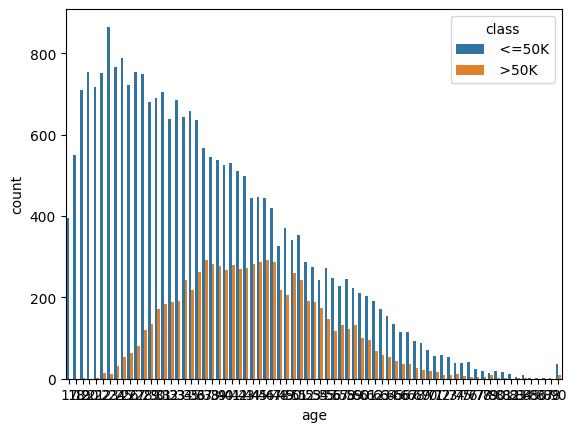

In [28]:
sns.countplot(x = 'age' ,  hue = 'class' , data=df)

<Axes: xlabel='sex', ylabel='count'>

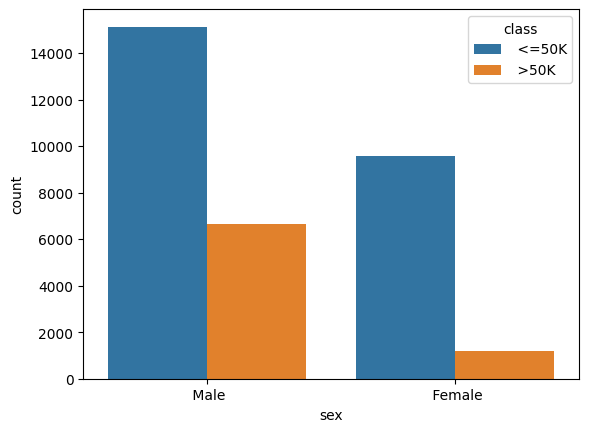

In [29]:
sns.countplot(x = 'sex' ,  hue = 'class' , data=df)

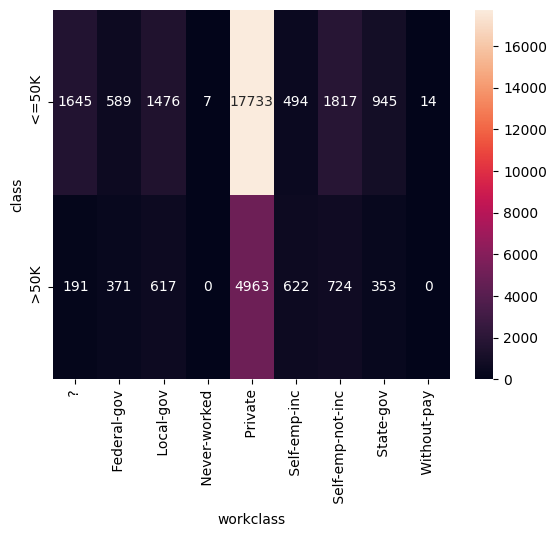

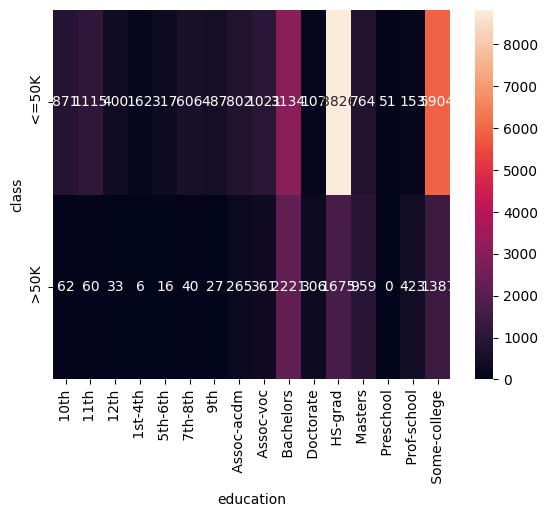

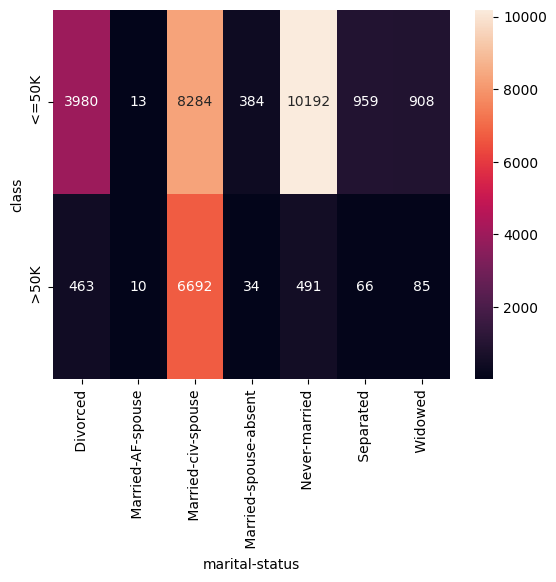

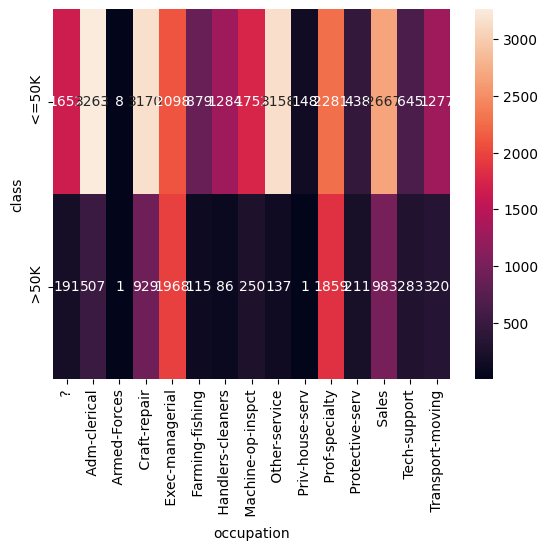

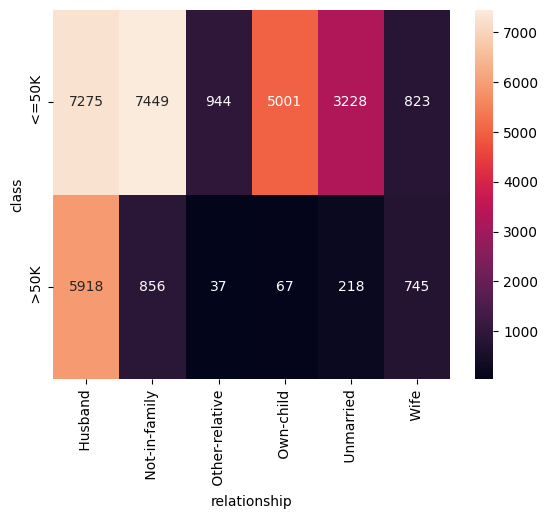

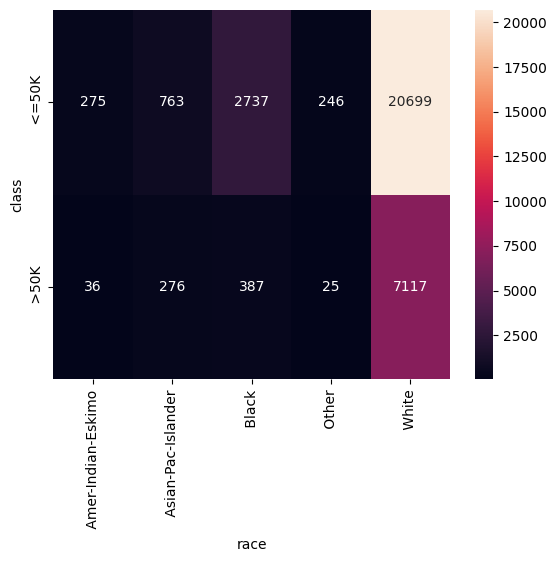

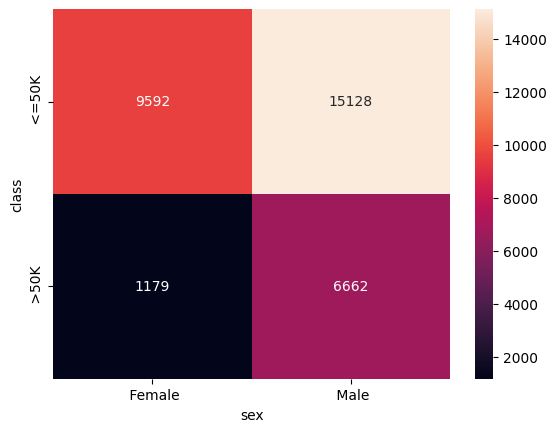

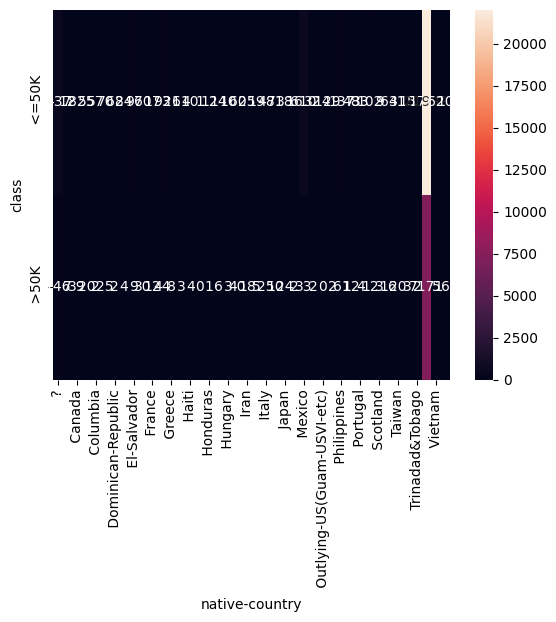

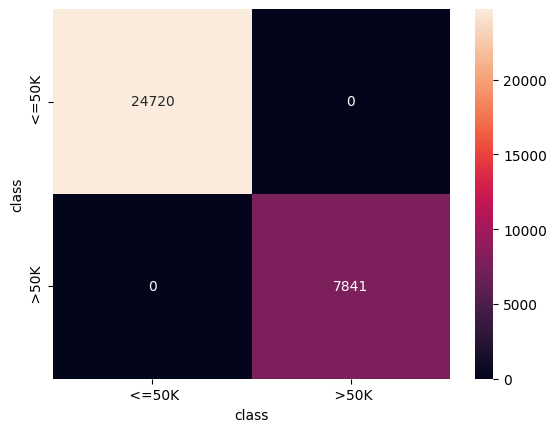

In [30]:
for col in df.select_dtypes('object'):
    plt.figure()
    sns.heatmap(pd.crosstab(df['class'] , df[col]) , annot=True , fmt='d')

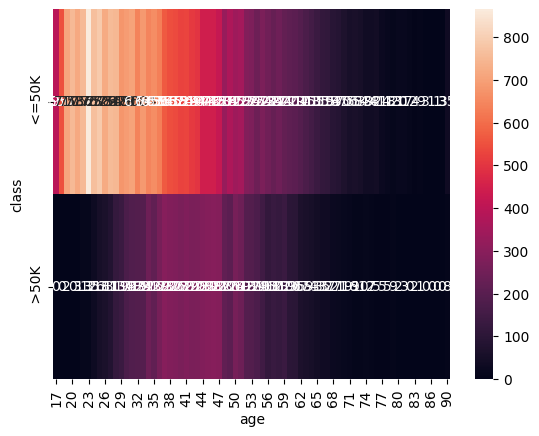

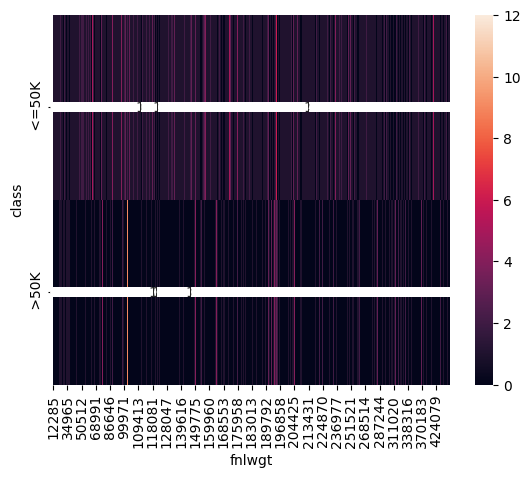

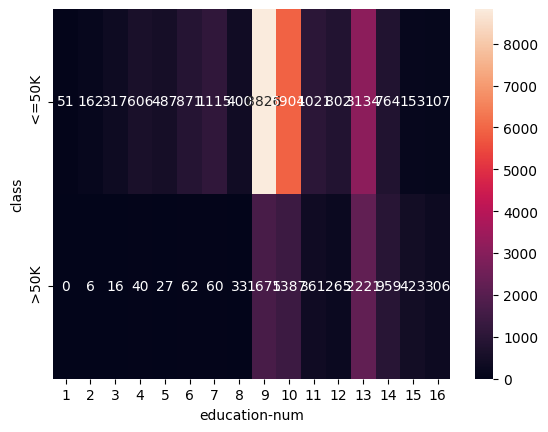

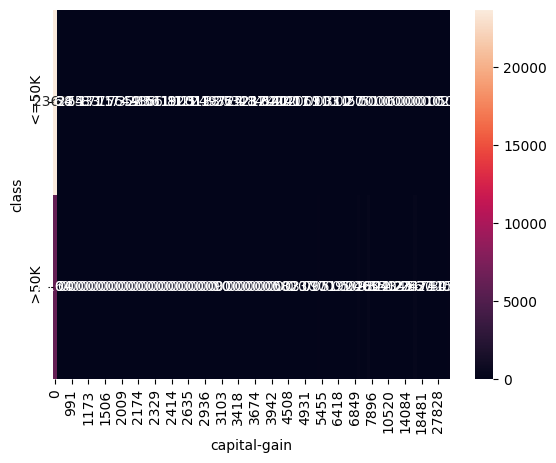

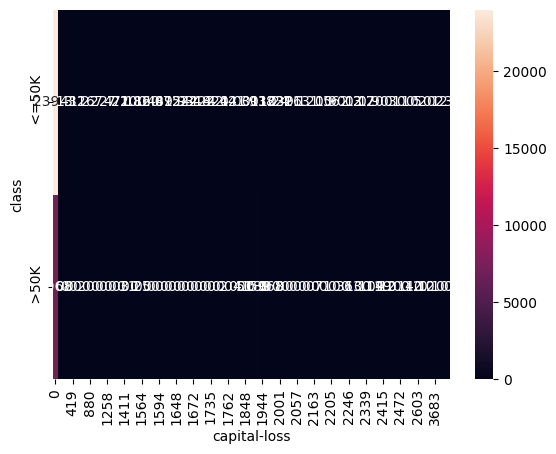

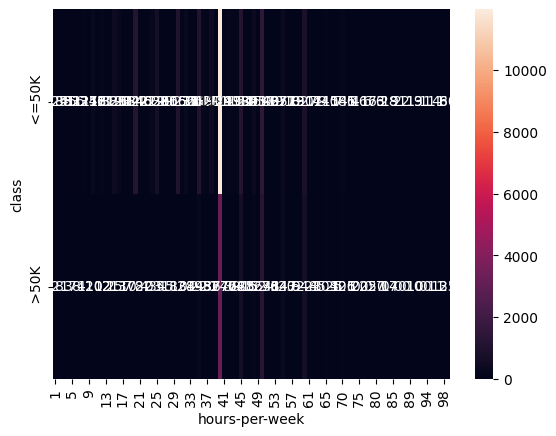

In [31]:
for col in df.select_dtypes('int'):
    plt.figure()
    sns.heatmap(pd.crosstab(df['class'] , df[col]) , annot=True , fmt='d')

Analyse plus détaillée 

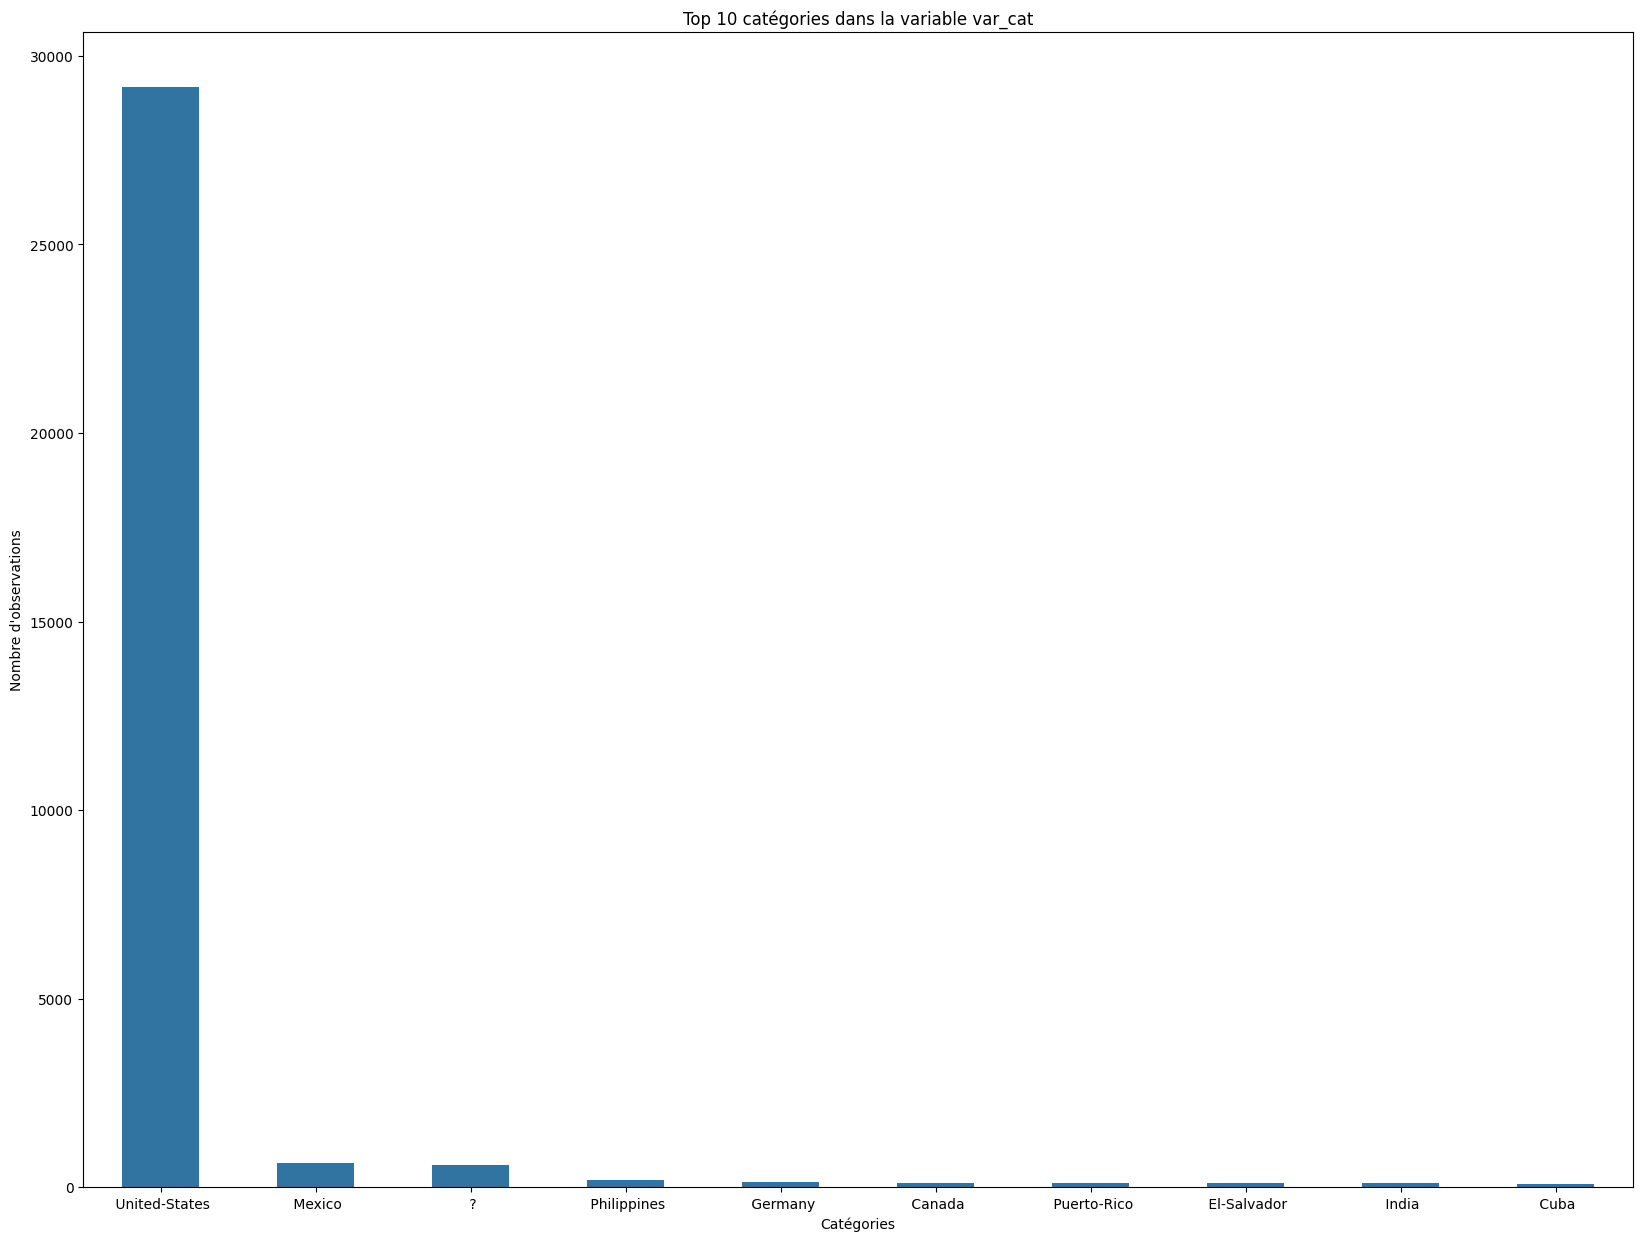

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sélectionne les n premières catégories avec le plus d'occurrences
n = 10
top_cats = df['native-country'].value_counts().nlargest(n).index.tolist()

# Crée un diagramme à barres des n premières catégories
plt.figure(figsize=(20, 15))
sns.countplot(x='native-country', data=df, order=top_cats , width=0.5)

# Ajoute des étiquettes pour les axes et le titre
plt.xlabel('Catégories')
plt.ylabel('Nombre d\'observations')
plt.title('Top ' + str(n) + ' catégories dans la variable var_cat')

# Affiche le diagramme à barres
plt.show()

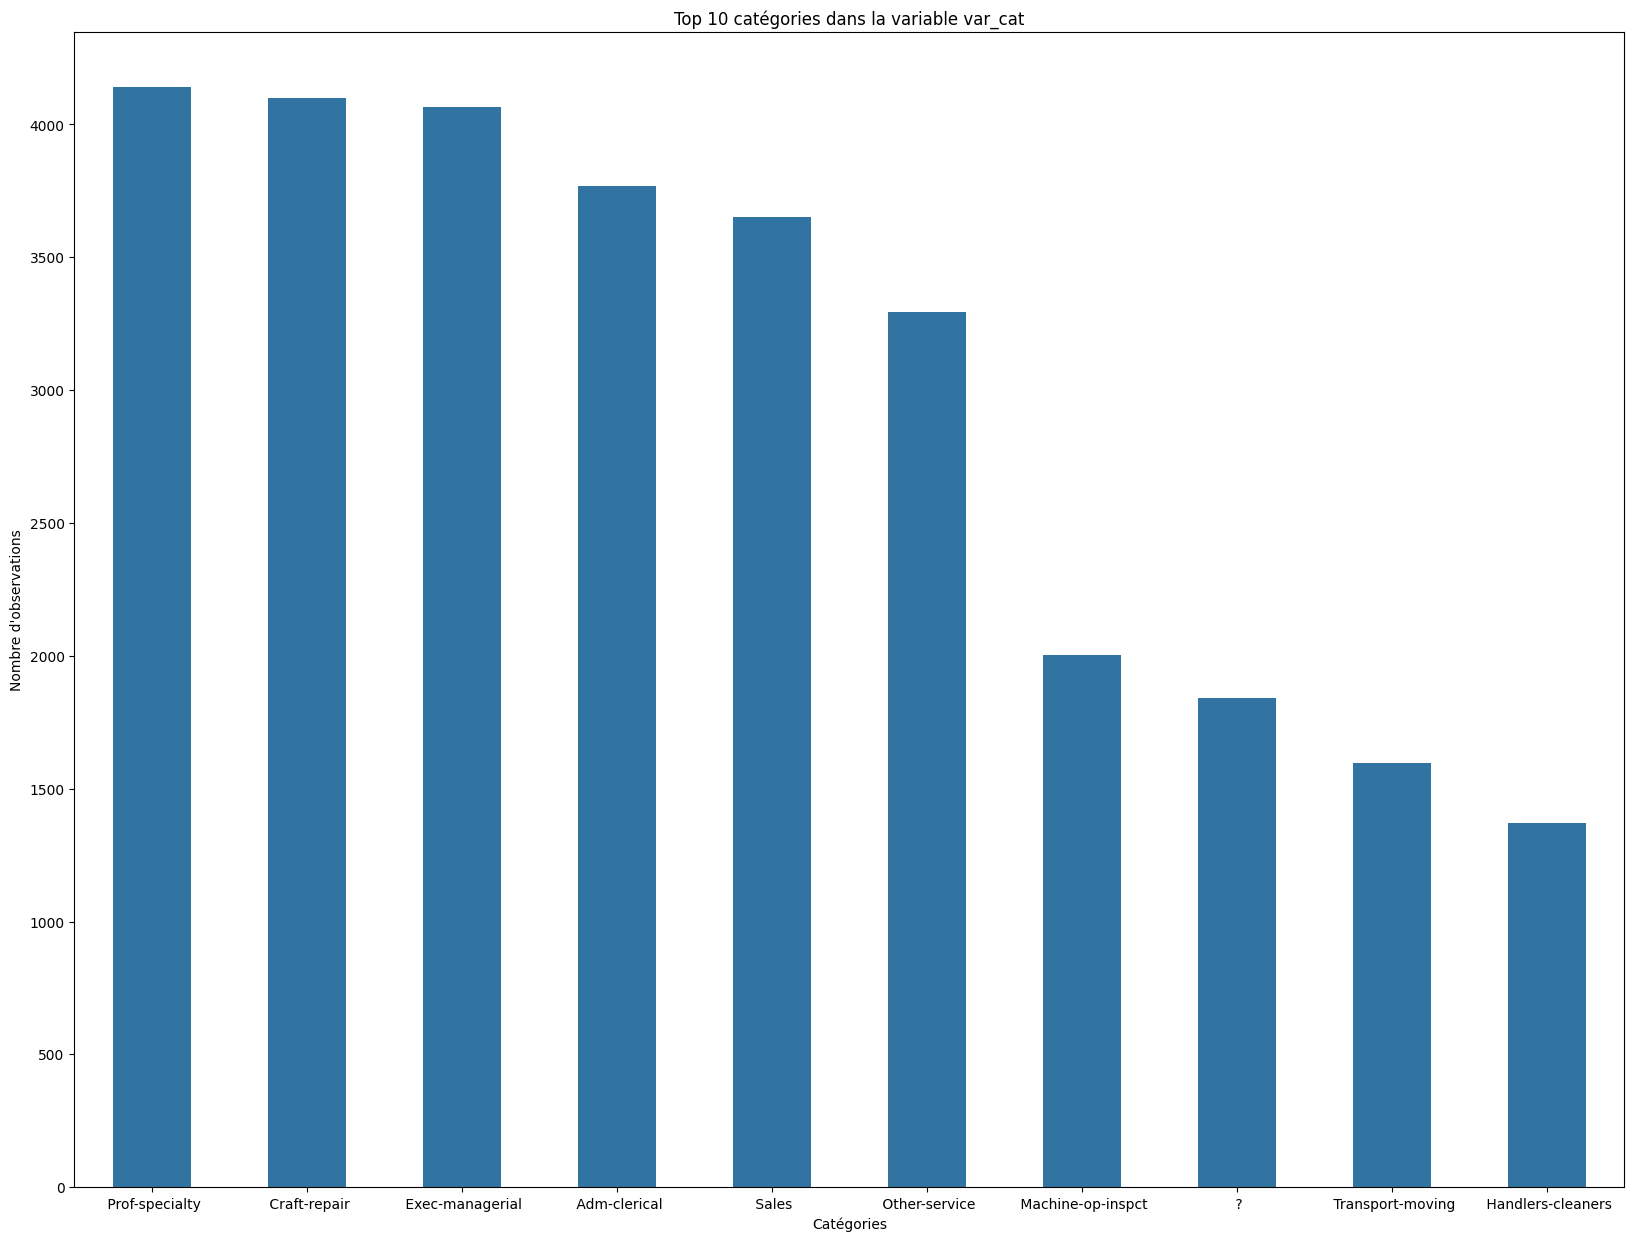

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sélectionne les n premières catégories avec le plus d'occurrences
n = 10
top_cats = df['occupation'].value_counts().nlargest(n).index.tolist()

# Crée un diagramme à barres des n premières catégories
plt.figure(figsize=(20, 15))
sns.countplot(x='occupation', data=df, order=top_cats , width=0.5)

# Ajoute des étiquettes pour les axes et le titre
plt.xlabel('Catégories')
plt.ylabel('Nombre d\'observations')
plt.title('Top ' + str(n) + ' catégories dans la variable var_cat')

# Affiche le diagramme à barres
plt.show()

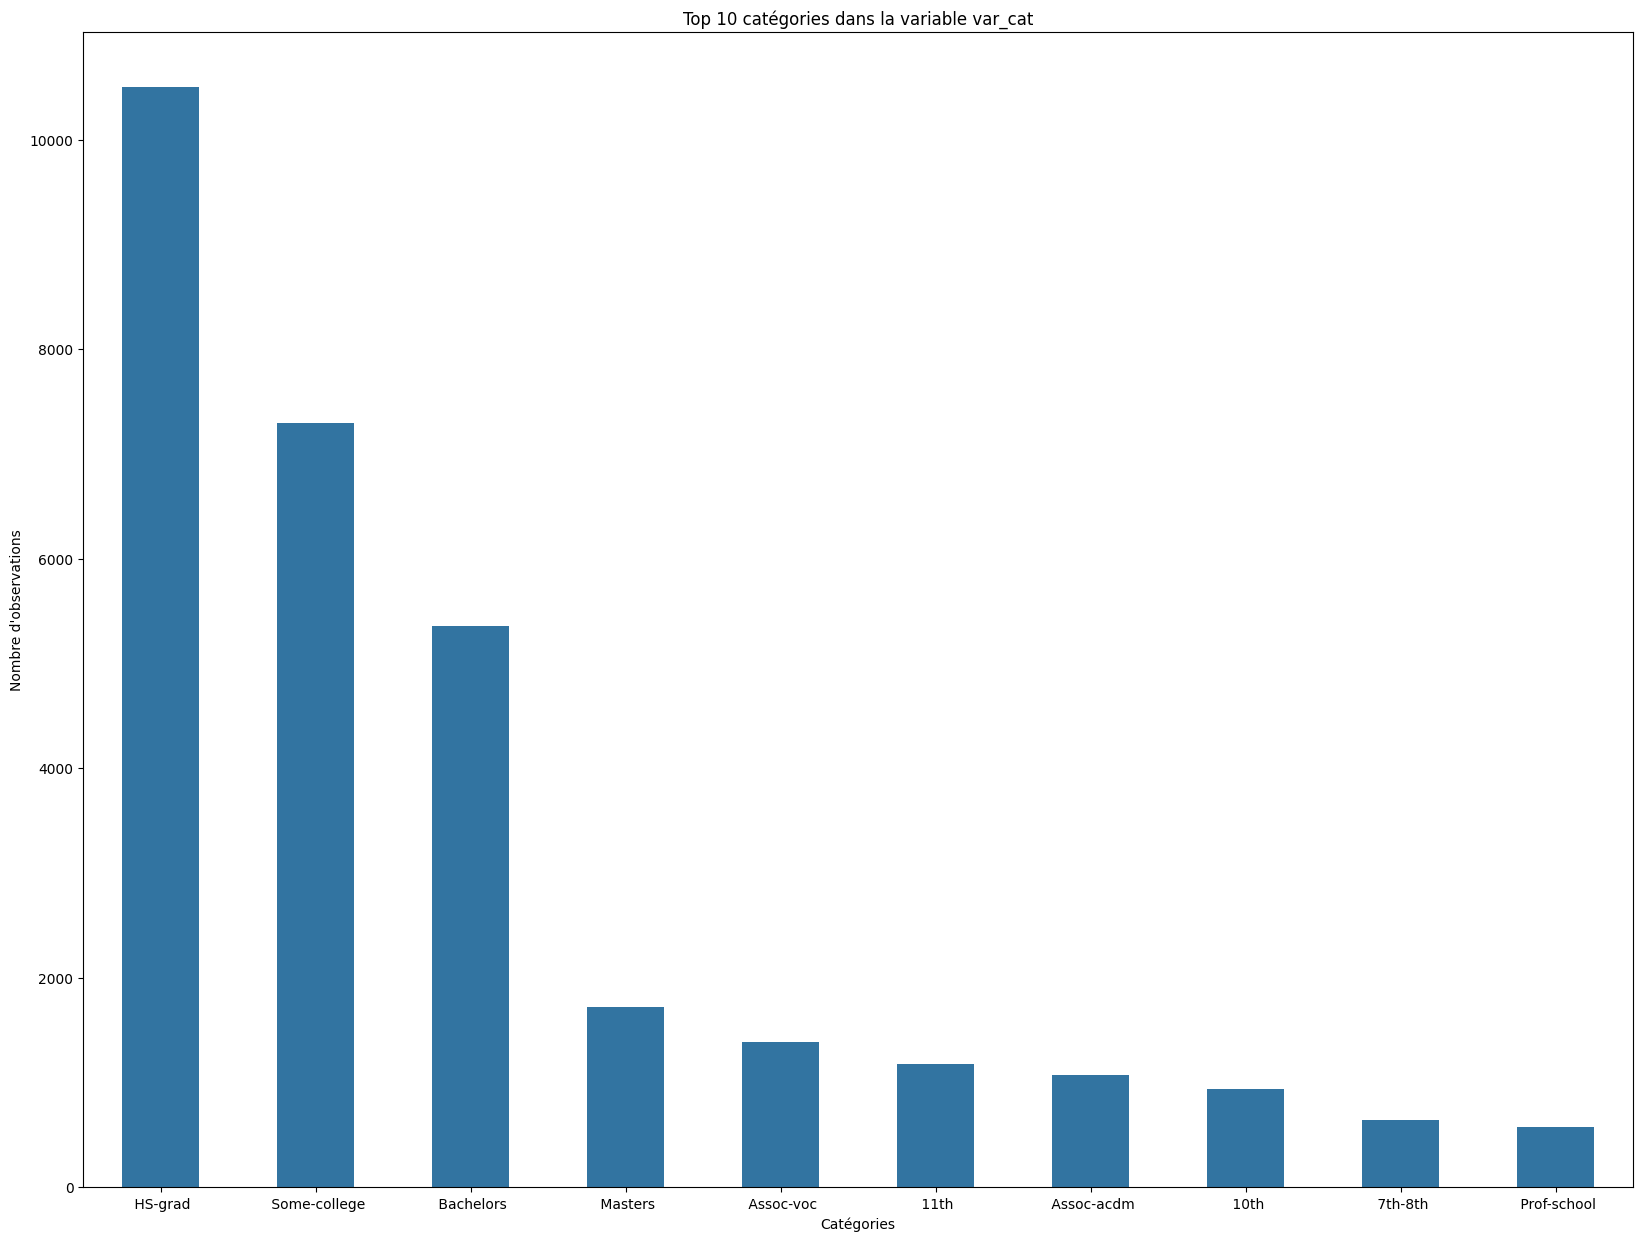

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sélectionne les n premières catégories avec le plus d'occurrences
n = 10
top_cats = df['education'].value_counts().nlargest(n).index.tolist()

# Crée un diagramme à barres des n premières catégories
plt.figure(figsize=(20, 15))
sns.countplot(x='education', data=df, order=top_cats , width=0.5)

# Ajoute des étiquettes pour les axes et le titre
plt.xlabel('Catégories')
plt.ylabel('Nombre d\'observations')
plt.title('Top ' + str(n) + ' catégories dans la variable var_cat')

# Affiche le diagramme à barres
plt.show()

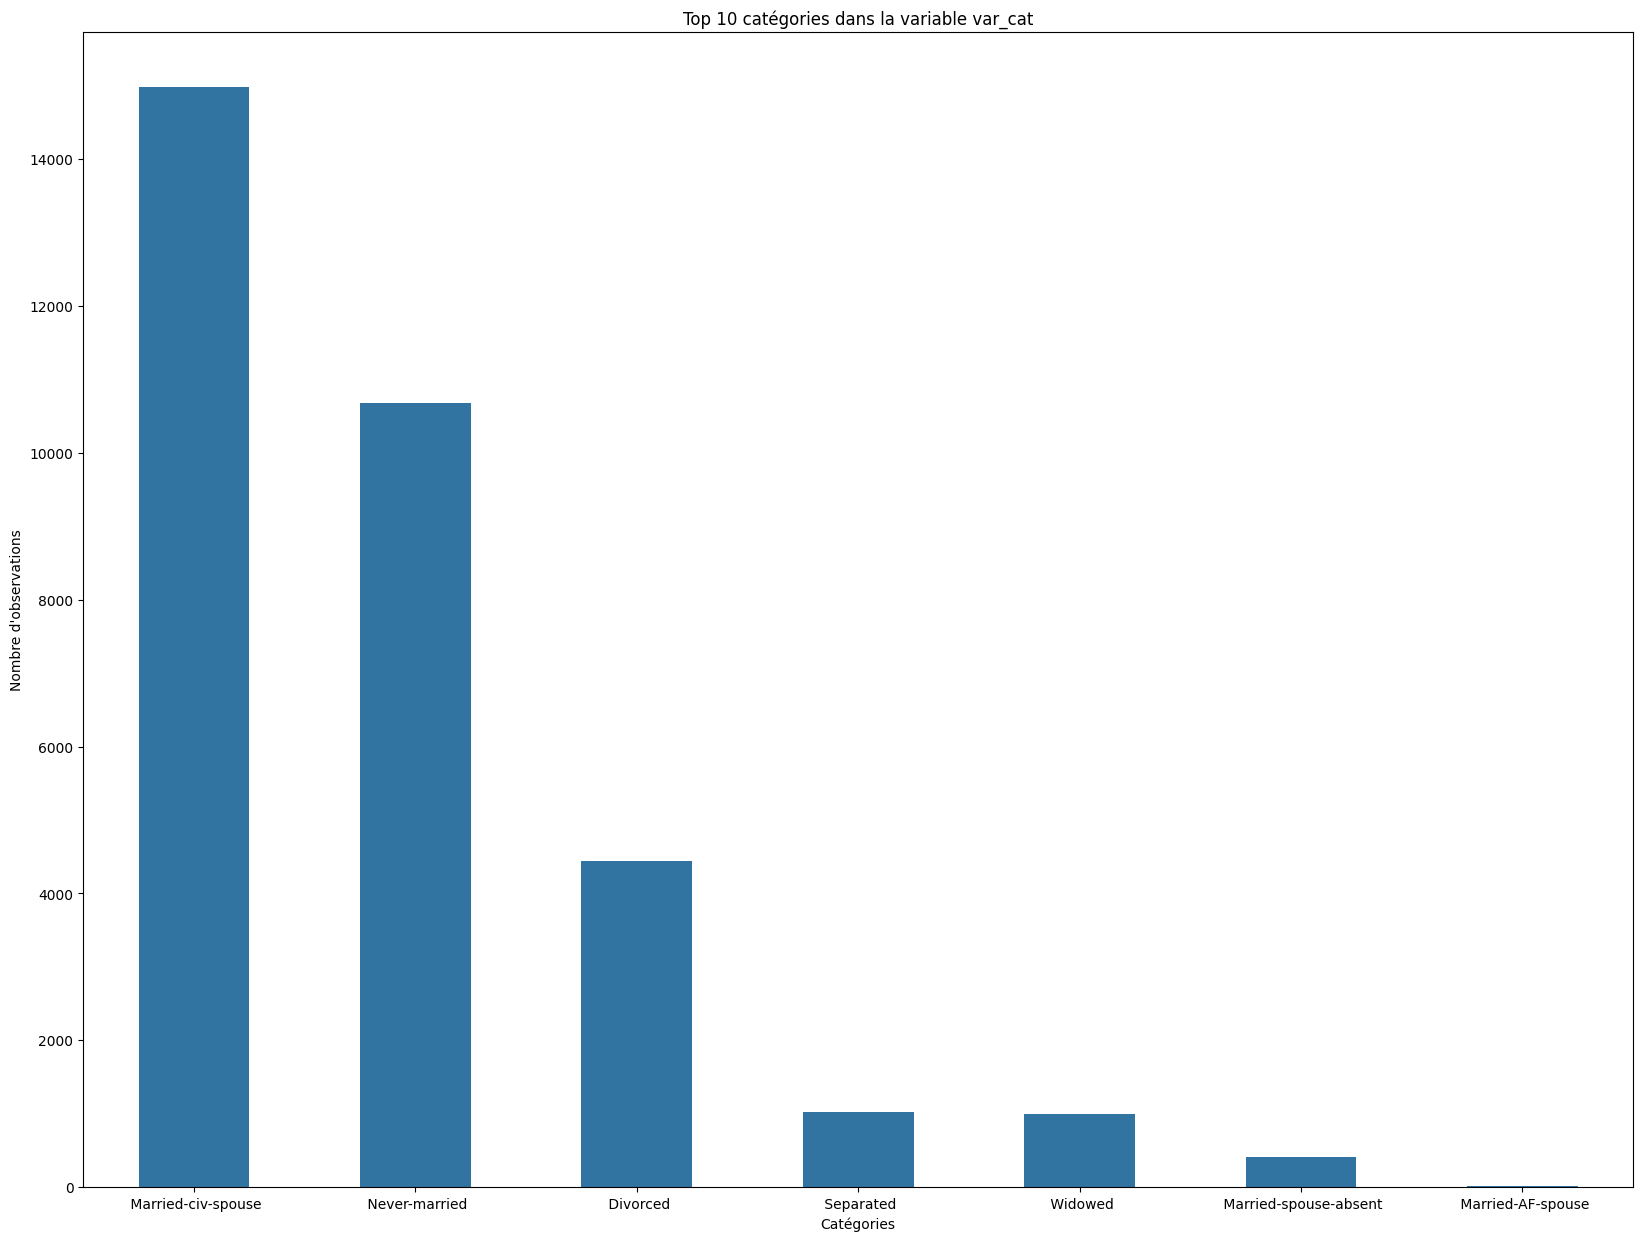

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sélectionne les n premières catégories avec le plus d'occurrences
n = 10
top_cats = df['marital-status'].value_counts().nlargest(n).index.tolist()

# Crée un diagramme à barres des n premières catégories
plt.figure(figsize=(20, 15))
sns.countplot(x='marital-status', data=df, order=top_cats , width=0.5)

# Ajoute des étiquettes pour les axes et le titre
plt.xlabel('Catégories')
plt.ylabel('Nombre d\'observations')
plt.title('Top ' + str(n) + ' catégories dans la variable var_cat')

# Affiche le diagramme à barres
plt.show()

In [ ]:
 1. Création d'une nouvelle variable  Married-civ-spouse 
 2. Création d'une nouvelle variable  Hs grad
 3. Création d'une nouvelle variable  prof speciality 